# Tâche 6 : Analyse de la diffraction

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import plotly.graph_objects as go

In [13]:
mp_key = "MgnCbwKILRoKeWCsa2tbfn04aBTHkB78"
mp_id = "mp-1747"

In [14]:
with MPRester(mp_key) as m:
    print("Téléchargement du fichier CIF de K2Te..")
    prim_struc = m.get_structure_by_material_id(mp_id)
    print("Téléchargement terminé")
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
xrd = XRDCalculator("CuKa1")
data = xrd.get_pattern(conv_struc)

Téléchargement du fichier CIF de K2Te..


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement terminé


## Calcul des 3 premiers pics de diffraction 

In [26]:
print("Calcul du premier pic de diffraction :\n\n")
print("Voici le premier pic du diffractogramme du K2Te pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
print("Angle 2Θ entre le rayon incident et réléchi :", data.x[0])
print("Intensité du premier pic :", data.y[0])
print("Indices hkl associés au pic :", data.hkls[0])
print("Distance inter-plan :", data.d_hkls[0])

print("\n\n ----------------------------------------\n\n")

print("Calcul du deuxième pic de diffraction :\n\n")
print("Voici le deuxième pic du diffractogramme du K2Te pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
print("Angle 2Θ entre le rayon incident et réléchi :", data.x[1])
print("Intensité du deuxième pic :", data.y[1])
print("Indices hkl associés au pic:", data.hkls[1])
print("Distance inter-plan :", data.d_hkls[1])

print("\n\n ----------------------------------------\n\n")

print("Calcul du troisième pic de diffraction :\n\n")
print("Voici le troisième pic du diffractogramme du K2Te pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å")
print("Angle 2Θ entre le rayon incident et réléchi :", data.x[2])
print("Intensité du troisième pic :", data.y[2])
print("Indices hkl associés au pic:", data.hkls[2])
print("Distance inter-plan :", data.d_hkls[2])

Calcul du premier pic de diffraction :


Voici le premier pic du diffractogramme du K2Te pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2Θ entre le rayon incident et réléchi : 18.76834058775249
Intensité du premier pic : 82.81992664624693
Indices hkl associés au pic : [{'hkl': (1, 1, 1), 'multiplicity': 8}]
Distance inter-plan : 4.7240969468505


 ----------------------------------------


Calcul du deuxième pic de diffraction :


Voici le deuxième pic du diffractogramme du K2Te pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54060 Å
Angle 2Θ entre le rayon incident et réléchi : 21.70459493627685
Intensité du deuxième pic : 4.3589600224960945
Indices hkl associés au pic: [{'hkl': (2, 0, 0), 'multiplicity': 6}]
Distance inter-plan : 4.091187965913037


 ----------------------------------------


Calcul du troisième pic de diffraction :


Voici le troisième pic du diffractogramme du K2Te pour un rayonnement X incident CuKα de longueur d’onde: λ=1.54

## Affichage des 3 premiers pics du diffractogramme de K2Te  

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

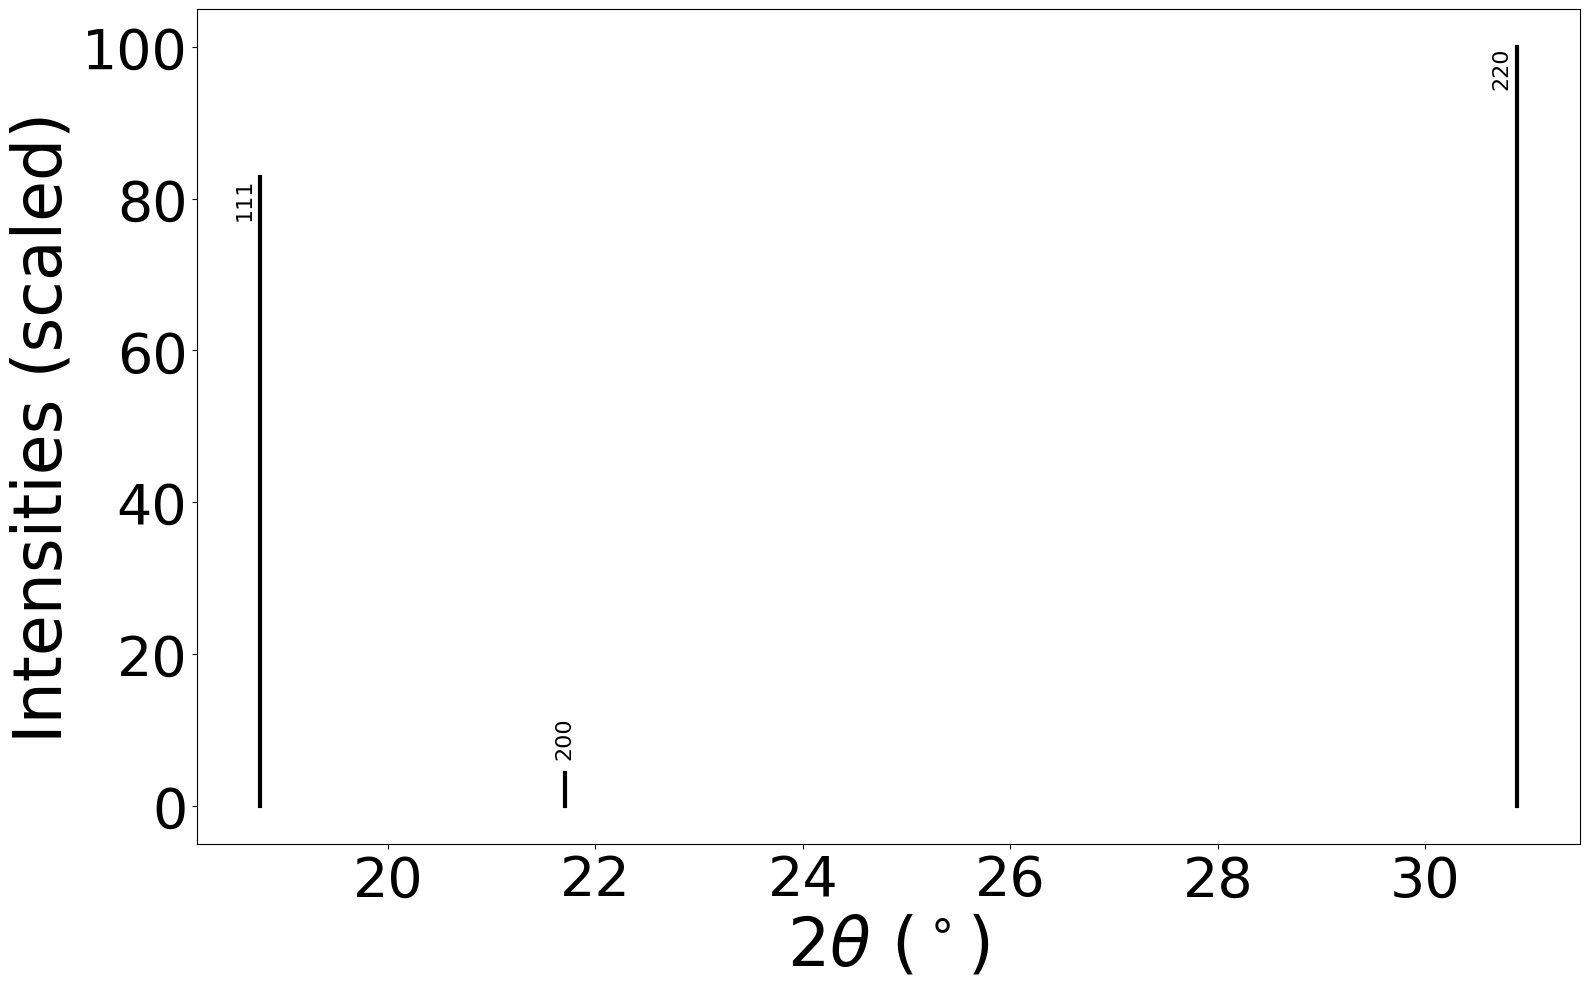

In [22]:

xrd.get_plot(conv_struc, two_theta_range=(0,35))

## Analyse des résulats 

Nous avons pu voir sur la figure ci-dessus les 3 premiers pics de diffractions. Nous savons qu'il n'y a réfraction (donc interférences constructives) que si le vecteur d'onde : $\textbf{$\vec{k}$}$ appartient au plan médiateur entre l'orgine de la maille et un autre noeud : $\textbf{K}$. Ce plan est appelé le plan de Bragg. Cependant, nous utilisons plus souvent la formule qui exprime la condition de Bragg afin de trouver les $\theta$ qui permettront la diffraction : $n\lambda = 2d\sin{\theta}$. Nous remarquons donc que les interférences apparaitront pour seulement certaines valeurs discrètes de $\theta$. Nous pouvons aussi conclure que plus $\theta$ sera grandau plus l'intensité sera petite car l'intensité est lié au facteur de forme atomique qui est inversément proportionnel à $\theta$. Le facteur de forme d'un atome est défini comme le rapport entre l’amplitude diffusée par l’atome et celle diffusée par un électron (source : notes de cours). 

Pourquoi le troisième pic est-il si élevé alors ? La réponse se trouve dans le fait que la famille de plan (2 2 0) possède une plus grande multiplicité que la famille de plan (2 0 0) et donc permet plus la diffraction. La distance inter-plan est aussi plus faible ce qui influence aussi l'intensité de l'onde réfractée. 